In [1]:
import math
import numpy as np
from copy import deepcopy
from random import randint

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

In [2]:
from IPython.display import Image
Image("(un)supervised.png",width=1000)

In [3]:
groups = 4

# Generate random blob data with 5000 samples,  4 centers and 2 features

X, y_true = make_blobs(n_samples=5000, centers=4, cluster_std=0.7, random_state=1)

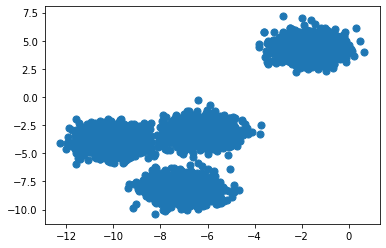

In [4]:
# visualize the dataset
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [5]:
#random_X = np.random.uniform(low=np.min(X[:,0])*0.2, high=np.max(X[:,0])*0.8)
#random_y = np.random.uniform(low=np.min(X[:,1])*0.2, high=np.max(X[:,1])*0.8)

In [6]:
# Create a function to generate N random centers
def generate_random_centers(x, k):
    n_features = x.shape[1]
    result = np.empty((k,2))
    for i in range(k):
      center_i_x_coordinate = np.random.uniform(low=np.min(X[:,0])*0.2, high=np.max(X[:,0])*0.8)
      center_i_y_coordinate = np.random.uniform(low=np.min(X[:,1])*0.2, high=np.max(X[:,1])*0.8)

    result[i,0] = center_i_x_coordinate
    result[i,1] = center_i_y_coordinate
    return result


c_positions = generate_random_centers(X, groups)
print(c_positions)

[[10.          7.5       ]
 [ 5.          2.5       ]
 [ 0.          2.5       ]
 [ 0.09944151  5.72476388]]


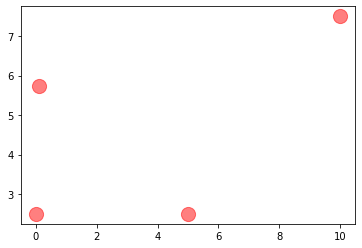

In [7]:
# Visualize the random centers
plt.scatter(c_positions[:,0], c_positions[:,1], c='red', s=200, alpha=0.5)
plt.show()

In [8]:
# Helper functions to calculate the distance between a point and a center
def dist(a,b):
    com = a-b
    sum = 0
    for c in com:
        sum += c**2
    return math.sqrt(sum)
    
def dist_2d(a,b):
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i][0] - b[i][0])**2 + (a[i][1] - b[i][1])**2
    dist = math.sqrt(squared_distance)
    return dist

In [14]:
def kmean(x, number_of_clusters, threshold = 0.000001):
    ...
    # Generate random centers
    centers = generate_random_centers(x, number_of_clusters)
    # craete numpy zeros to store the clusters id of each element
    clusters = np.zeros(len(x))
    # create numpy zeros to store the previous centers
    old_centers = np.zeros(centers.shape)
    #set error to 1
    error = 1

    # Iterate until error is less than threshold
    while error > threshold:

        # assign each element to the closest center
        # Iterate through each element
        for i in range(len(x)):
            # calculate the distance between the element and each center
            distances = [dist(x[i], c) for c in centers]
            # select the nearest center
            nearest_cluster = np.argmin(clusters)
            # assign the element to the cluster
            clusters[i] = nearest_cluster
        
        # save the centers as old centers
        old_centers = deepcopy(centers)
        centers = np.zeros(centers.shape)

        # calculate the new centers by taking the average of each cluster

        # Iterate through each cluster
        for j in range(0, number_of_clusters):
          # select the elements belonging to the cluster
          points = []
          for n in range(len(x)):
            if clusters[n] == j:
              points.append(x[n]) 

          # calculate the mean of the cluster
          centers[j] = np.mean(points, axis = 0)
        
        # calculate the distance between the new and old centers
        error = dist_2d(centers, old_centers)
    #return the centers and the clusters
    return centers, clusters

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(4, 2)
<class 'numpy.ndarray'>
(5000,)
<class 'numpy.ndarray'>


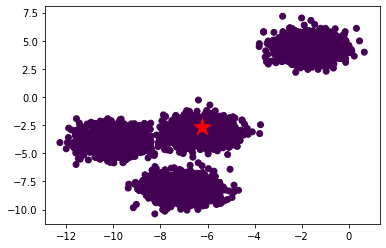

In [15]:
# Run the K-means algorithm with 4 clusters and visualize the results
centers, clusters = kmean(X,  4)

print(centers.shape)
print(type(centers))
print(clusters.shape)
print(type(clusters))

plt.scatter(X[:, 0], X[:, 1], c = clusters)
plt.scatter(centers[:, 0], centers[:, 1],  marker='*', s=300, c='r')
plt.show()

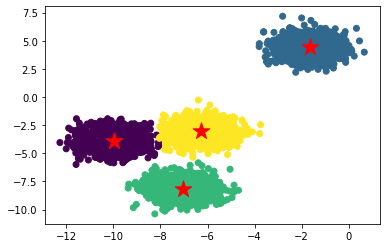

In [17]:
# Run the K-means algorithm with 2,3  clusters and visualize the results
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=0).fit(X)
clusters = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c = clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  marker='*', s=300, c='r')
plt.show()

In [20]:
x_modif = np.array([(5, -4)])
print(kmeans.predict(x_modif))

print(kmeans.cluster_centers_)

[1]
[[-9.98959334 -3.92727009]
 [-1.64200648  4.42205304]
 [-7.05898207 -8.20796995]
 [-6.26477724 -3.06282323]]


In [19]:
y = np.array([(-5, -7)])
print(kmeans.predict(y))

[2]
